# OCH Benchmarks

In [1]:
import math
import time
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from och import OCH

In [2]:
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["font.size"] = 15
plt.rcParams["figure.titlesize"] = 25
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 15
plt.rcParams["ytick.labelsize"] = 15
plt.rcParams["legend.fontsize"] = 13
plt.rcParams["lines.linewidth"] = 2

In [3]:
iter_no = 100
params = {'k': 5, 'l': 5.0, 's': 1.0, 'dim': 100, 'hash_no': 3}

color = "tab:red"
guide_linestyle=(0, (1, 1))

## Throughput Saturation by Cache

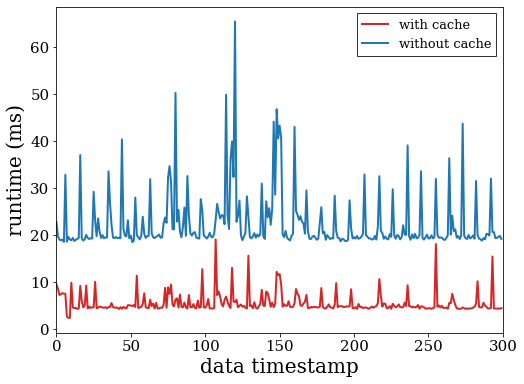

In [4]:
dims, x_0_no, x_1_no = [10 ** 2, 10 ** 6], 300, 10
och1 = OCH(params['k'], params['l'], params['s'], dims, params['hash_no'])
och2 = OCH(params['k'], params['l'], params['s'], dims, params['hash_no'], cache_no=[0, 0])
x_0s = [tf.random.normal(shape=[dims[0]]) for _ in range(x_0_no)]
x_1s = [tf.random.normal(shape=[dims[1]]) for _ in range(x_1_no)]
xs = [[x_0, x_1s[random.randrange(len(x_1s))]] for x_0 in x_0s]

runtimes1, runtimes2 = [], []
for x in xs:
    time1 = time.time()
    och1.update(x)
    time2 = time.time()
    och2.update(x)
    time3 = time.time()
    runtimes1.append(time2 - time1)
    runtimes2.append(time3 - time2)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
ax.set_xlabel("data timestamp")
ax.set_ylabel("runtime (ms)")
ax.set_xlim(0, x_0_no)
ax.plot(list(range(len(runtimes1))), [runtime1 * 10 ** 3 for runtime1 in runtimes1], color=color, label="with cache")
ax.plot(list(range(len(runtimes2))), [runtime2 * 10 ** 3 for runtime2 in runtimes2], color="tab:blue", label="without cache")
ax.legend(edgecolor='black', fancybox=False)

## Throughput for Hyperparameters

### Throughput for dimension

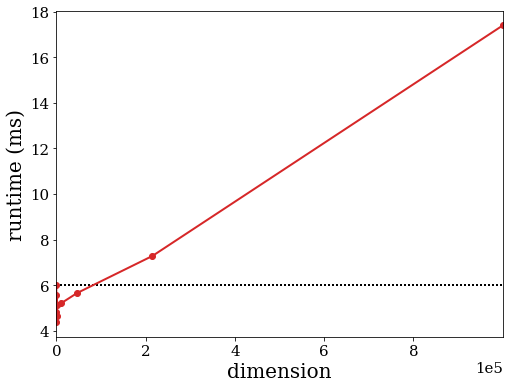

In [5]:
dim_start, dim_end, dim_no = 1, 10 ** 6, 10
dims = np.logspace(math.log(dim_start, 10), math.log(dim_end, 10), dim_no, dtype=np.int32)

runtimes = []
for dim in dims:
    och = OCH(params['k'], params['l'], params['s'], [dim], params['hash_no'])
    xs = [[tf.random.normal(shape=[dim])] for _ in range(iter_no)]
    _runtimes = []
    for x in xs:
        time1 = time.time()
        och.update(x)
        time2 = time.time()
        _runtimes.append(time2 - time1)
    runtimes.append((dim, np.mean(_runtimes)))

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
ax.set_xlabel("dimension")
ax.set_ylabel("runtime (ms)")
ax.set_xlim(0, max([dim for dim, mean in runtimes]))
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax.axhline(runtimes[0][1] * 10 ** 3, ls=guide_linestyle, color="black")
ax.plot([dim for dim, mean in runtimes], [mean * 10 ** 3 for dim, mean in runtimes], color=color, marker='o')

### Throughput for hash number

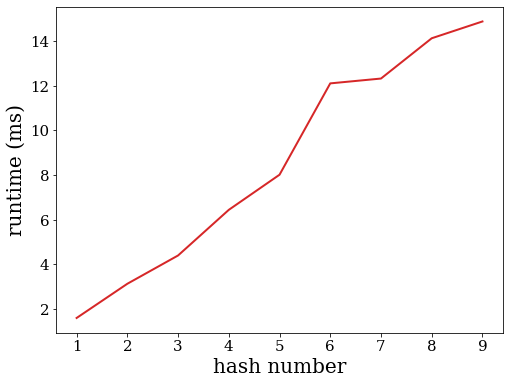

In [6]:
hn_start, hn_end, hn_by = 1, 10, 1
hns = list(range(hn_start, hn_end, hn_by))

runtimes = []
for hn in hns:
    och = OCH(params['k'], params['l'], params['s'], [params['dim']], hn)
    xs = [[tf.random.normal(shape=[params['dim']])] for _ in range(iter_no)]
    _runtimes = []
    for x in xs:
        time1 = time.time()
        och.update(x)
        time2 = time.time()
        _runtimes.append(time2 - time1)
    runtimes.append((hn, np.mean(_runtimes)))

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
ax.set_xlabel("hash number")
ax.set_ylabel("runtime (ms)")
ax.plot([hn for hn, mean in runtimes], [mean * 10 ** 3 for hn, mean in runtimes], color=color, marker='o')